In [1]:
using Robotics

┌ Info: Precompiling Robotics [facd5b7b-9aee-4b35-b3b8-a081b31a0ace]
└ @ Base loading.jl:1242
┌ Info: Skipping precompilation since __precompile__(false). Importing Robotics [facd5b7b-9aee-4b35-b3b8-a081b31a0ace].
└ @ Base loading.jl:1017


In [2]:
robot = Robot()

Connected to remoteApi server.
Pioneer_p3dx_ultrasonicSensor1 connected.
Pioneer_p3dx_ultrasonicSensor2 connected.
Pioneer_p3dx_ultrasonicSensor3 connected.
Pioneer_p3dx_ultrasonicSensor4 connected.
Pioneer_p3dx_ultrasonicSensor5 connected.
Pioneer_p3dx_ultrasonicSensor6 connected.
Pioneer_p3dx_ultrasonicSensor7 connected.
Pioneer_p3dx_ultrasonicSensor8 connected.
Pioneer_p3dx_ultrasonicSensor9 connected.
Pioneer_p3dx_ultrasonicSensor10 connected.
Pioneer_p3dx_ultrasonicSensor11 connected.
Pioneer_p3dx_ultrasonicSensor12 connected.
Pioneer_p3dx_ultrasonicSensor13 connected.
Pioneer_p3dx_ultrasonicSensor14 connected.
Pioneer_p3dx_ultrasonicSensor15 connected.
Pioneer_p3dx_ultrasonicSensor16 connected.
Laser connected.
Vision sensor connected.
Left motor connected.
Right motor connected.
Robot connected.


Robot(0, Int32[328, 327, 326, 325, 324, 323, 322, 321, 336, 335, 334, 333, 332, 331, 330, 329], 348, 355, Dict(:left => 311,:right => 308), 307, 0.381f0, 0.0975f0)

In [3]:
sonar_data = read_sonar(robot)

@show(sonar_data)

nothing

sonar_data = Float32[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.5782276, 0.45125693, 0.4375561, 5.0, 5.0, 5.0, 5.0]


In [4]:
laser_data = read_laser(robot)

@show(laser_data[1:10])

println(length(laser_data))

nothing

laser_data[1:10] = Float32[-0.6407645, -1.1098368, 0.06299993, -2.383433, -4.1874123, 0.062999696, -2.3518267, -4.191558, 0.062999696, -2.311458]
1245


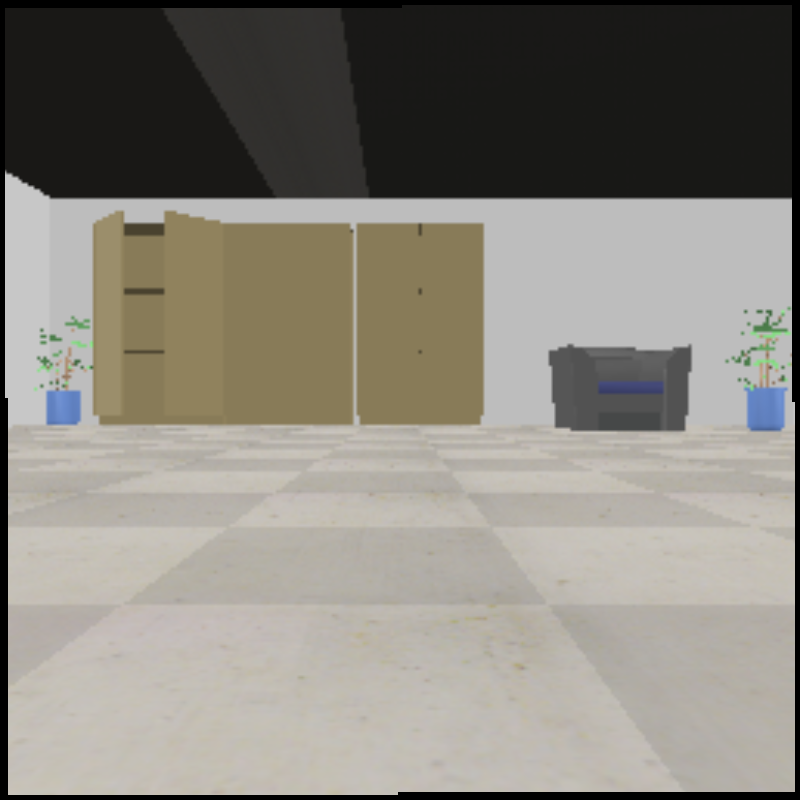

In [5]:
using Images

resolution, image_data = read_vision(robot)
image = imrotate(colorview(RGB, reshape(Float64.(image_data) / 255, 3, Int64.(resolution)...)), 3π/2)

imresize(image, 800, 800)

In [6]:
position = get_current_position(robot)
orientation = get_current_orientation(robot)

@show(position)
@show(orientation)

nothing

position = Float32[-2.0335097, -0.8255184, 0.13867855]
orientation = Float32[-7.5282434e-5, -0.0019923416, -0.0008590598]


In [7]:
p0 = get_current_position(robot)
a0 = get_current_orientation(robot)

@show(p0)
@show(a0)

set_velocity(robot, 0.1, 0)

sleep(5)

stop(robot)

p1 = get_current_position(robot)
a1 = get_current_orientation(robot)

@show(p1)
@show(a1)

nothing

p0 = Float32[-2.033505, -0.82551897, 0.13868077]
a0 = Float32[-7.5282434e-5, -0.0019923416, -0.0008590598]
p1 = Float32[-1.9020351, -0.82566774, 0.13868752]
a1 = Float32[-7.927546e-5, -0.0018367601, -0.0014072252]


In [8]:
reset_simulation()

robot = Robot()

p2 = get_current_position(robot)
a2 = get_current_orientation(robot)

@show(p0)
@show(p1)
@show(p2)

@show(a0)
@show(a1)
@show(a2)

nothing

Simulation stopped...
Simulation started...
Connected to remoteApi server.
Pioneer_p3dx_ultrasonicSensor1 connected.
Pioneer_p3dx_ultrasonicSensor2 connected.
Pioneer_p3dx_ultrasonicSensor3 connected.
Pioneer_p3dx_ultrasonicSensor4 connected.
Pioneer_p3dx_ultrasonicSensor5 connected.
Pioneer_p3dx_ultrasonicSensor6 connected.
Pioneer_p3dx_ultrasonicSensor7 connected.
Pioneer_p3dx_ultrasonicSensor8 connected.
Pioneer_p3dx_ultrasonicSensor9 connected.
Pioneer_p3dx_ultrasonicSensor10 connected.
Pioneer_p3dx_ultrasonicSensor11 connected.
Pioneer_p3dx_ultrasonicSensor12 connected.
Pioneer_p3dx_ultrasonicSensor13 connected.
Pioneer_p3dx_ultrasonicSensor14 connected.
Pioneer_p3dx_ultrasonicSensor15 connected.
Pioneer_p3dx_ultrasonicSensor16 connected.
Laser connected.
Vision sensor connected.
Left motor connected.
Right motor connected.
Robot connected.
p0 = Float32[-2.033505, -0.82551897, 0.13868077]
p1 = Float32[-1.9020351, -0.82566774, 0.13868752]
p2 = Float32[-2.0252995, -0.82498246, 0.138